<a href="https://colab.research.google.com/github/yuanjinren/DS-Unit-2-Applied-Modeling/blob/master/module3-permutation-boosting/YuanjinRen_LS_DS_233_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

Data Source: https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018

"200+ Financial Indicators of US stocks (2014-2018)" The last column of the dataset represent the class of each stock, where:

if the value of a stock increases during next year, then class=1;
if the value of a stock decreases during next year, then class=0.
The second-to-last column, PRICE VAR [%], lists the percent price variation of each stock for the next year. For example, percent price variation for the year 2016 (meaning from the first trading day on Jan 2016 to the last trading day on Dec 2016).

The columns PRICE VAR [%] and class make possible to use the datasets for both classification and regression tasks.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
pd.options.display.float_format = '{:,.2f}'.format

In [0]:
df2014 = pd.read_csv('/content/drive/My Drive/Data/2014_Financial_Data.csv')
df2015 = pd.read_csv('/content/drive/My Drive/Data/2015_Financial_Data.csv')
df2016 = pd.read_csv('/content/drive/My Drive/Data/2016_Financial_Data.csv')
df2017 = pd.read_csv('/content/drive/My Drive/Data/2017_Financial_Data.csv')
df2018 = pd.read_csv('/content/drive/My Drive/Data/2018_Financial_Data.csv')
df2014.shape,df2015.shape,df2016.shape,df2017.shape,df2018.shape

((3808, 225), (4120, 225), (4797, 225), (4960, 225), (4392, 225))

In [0]:
df2014.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
0,PG,"74,401,000,000.00",-0.07,"39,030,000,000.00","35,371,000,000.00",0.00,"21,461,000,000.00","21,461,000,000.00","13,910,000,000.00","709,000,000.00","14,494,000,000.00","2,851,000,000.00","142,000,000.00","-1,127,000,000.00","11,643,000,000.00",0.00,"11,643,000,000.00",4.19,4.01,"2,705,960,276.00","2,705,960,276.00",2.45,0.48,0.25,0.20,0.16,0.14,"18,344,000,000.00","15,203,000,000.00","11,785,000,000.00",0.19,0.16,"8,558,000,000.00","2,128,000,000.00","10,686,000,000.00","6,386,000,000.00","6,759,000,000.00","31,617,000,000.00","22,304,000,000.00","84,547,000,000.00",...,1.56,10.89,0.17,-1.42,-0.12,-0.00,0.01,0.03,0.04,0.04,-0.01,nan,0.07,-0.06,-0.07,0.03,0.01,-0.02,0.04,0.00,0.03,0.06,-0.01,0.01,0.14,0.04,0.02,0.10,0.08,0.08,-0.02,-0.02,0.04,0.03,0.12,0.00,-0.17,Consumer Defensive,-9.32,0
1,VIPS,"3,734,148,046.50",1.17,"2,805,625,443.98","928,522,602.52","108,330,319.66","344,141,427.19","793,926,703.26","134,595,899.26","12,148,692.28","175,382,305.46","39,559,573.78","-14,319,179.85",0.00,"135,822,731.68",0.00,"135,822,731.68",0.24,0.23,nan,"18,293,619.95",0.00,0.25,0.01,0.05,0.01,0.07,"245,685,824.99","187,530,997.74","121,503,551.82",0.05,0.04,"773,514,853.08","608,385,211.50","1,381,900,064.58","11,694,866.00","579,319,341.30","2,134,396,835.65","308,597,513.72","190,658,701.97",...,nan,nan,0.33,-17.86,1.25,1.61,1.95,1.56,1.46,1.46,0.02,0.02,0.00,0.21,-0.36,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.65,1.73,Consumer Defensive,-25.51,0
2,KR,"98,375,000,000.00",0.02,"78,138,000,000.00","20,237,000,000.00",0.00,"15,196,000,000.00","17,512,000,000.00","2,725,000,000.00","443,000,000.00","2,270,000,000.00","751,000,000.00","12,000,000.00",0.00,"1,519,000,000.00",0.00,"1,519,000,000.00",1.47,1.45,"1,033,052,512.00","1,028,000,000.00",0.31,0.21,0.04,0.03,0.01,0.01,"4,416,000,000.00","2,713,000,000.00","1,531,000,000.00",0.02,0.02,"401,000,000.00",0.00,"401,000,000.00","1,116,000,000.00","5,651,000,000.00","8,830,000,000.00","16,893,000,000.00","2,837,000,000.00",...,4.96,18.22,0.28,-2.27,0.02,-0.01,-0.01,0.01,0.06,0.05,-0.04,-0.03,0.24,0.21,0.39,0.10,0.10,0.14,0.09,0.09,0.09,0.23,0.09,0.19,0.07,0.06,0.08,0.00,0.12,0.16,0.06,0.10,0.19,0.33,0.27,0.00,0.02,Consumer Defensive,33

In [0]:
df2014.dtypes

Unnamed: 0               object
Revenue                 float64
Revenue Growth          float64
Cost of Revenue         float64
Gross Profit            float64
                         ...   
R&D Expense Growth      float64
SG&A Expenses Growth    float64
Sector                   object
2015 PRICE VAR [%]      float64
Class                     int64
Length: 225, dtype: object

In [0]:
df2014.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2015 PRICE VAR [%],Class
count,"3,764.00","3,572.00","3,734.00","3,756.00","3,672.00","3,749.00","3,745.00","3,753.00","3,745.00","3,728.00","3,742.00","3,659.00","3,659.00","3,785.00","3,659.00","3,793.00","3,736.00","3,724.00","3,572.00","3,698.00","3,659.00","3,761.00","3,606.00","3,758.00","3,607.00","3,649.00","3,744.00","3,804.00","3,785.00","3,761.00","3,751.00","3,750.00","2,875.00","2,878.00","3,749.00","3,693.00","2,937.00","3,720.00","3,773.00","2,896.00",...,"3,502.00","3,027.00","3,502.00","3,615.00","3,590.00","3,577.00","3,577.00","3,577.00","3,565.00","3,526.00","3,515.00","3,472.00","2,759.00","3,571.00","3,576.00","3,570.00","2,261.00","2,771.00","3,075.00","2,272.00","2,777.00","3,082.00","2,261.00","2,771.00","3,075.00","2,223.00","2,744.00","3,012.00","2,343.00","2,856.00","3,208.00","3,518.00","3,518.00","3,518.00","3,439.00","3,506.00","3,561.00","3,565.00","3,808.00","3,808.00"
mean,"5,879,049,508.86",12.95,"3,700,973,328.68","2,188,214,493.64","94,018,300.69","930,740,570.35","1,438,143,754.17","674,824,804.01","100,201,798.66","572,586,570.58","176,274,950.12","15,577,504.53","-3,453,914.56","489,433,459.17","5,343,176.81","483,916,550.20","-26,073.65","-26,534.76","286,532,060.68","290,498,788.67",3.41,0.47,-4.61,-3.74,-5.10,-3.23,"1,041,692,140.92","778,209,808.00","505,120,774.95",-4.04,-3.78,"1,615,347,052.89","261,295,626.76","849,623,768.39","961,511,276.18","486,649,400.81","3,111,922,494.88","2,941,115,316.94","1,664,753,607.06","424,559,860.96",...,48.11,5.16,27.89,"1,941.58","-15,165.78",95.34,3.63,3.86,-0.43,0.16,0.14,1.82,2.19,0.16,-1.34,-23.89,0.03,0.04,0.05,0.04,0.06,0.07,0.04,0.07,0.09,0.05,0.06,0.07,-0.02,0.01,0.04,4.45,0.16,2.28,0.81,1.36,0.60,0.38,975.16,0.43
std,"39,017,407,984.74",705.61,"30,406,884,047.08","11,590,276,491.38","640,891,150.89","4,820,927,723.23","7,305,171,047.19","3,786,290,546.56","699,109,057.84","2,793,740,189.66","1,011,342,050.91","162,042,654.37","236,039,874.47","4,396,691,827.07","67,601,070.18","4,392,279,477.97","1,672,636.24","1,673,673.21","2,304,822,866.77","2,403,028,027.12",167.01,1.06,82.47,63.21,90.14,54.46,"6,057,031,597.31","5,329,002,790.49","4,415,836,921.22",64.60,63.30,"14,946,608,973.59","2,125,870,901.07","3,855,420,976.04","6,0

###Data Exploration

Check number of companies with good increase or negative increase.

In [0]:
low_rate = 0
high_rate =100
bottom = df2014[df2014['2015 PRICE VAR [%]'] < low_rate]
top = df2014[df2014['2015 PRICE VAR [%]'] > high_rate]
#bottom = bottom['2015 PRICE VAR [%]'].sort_values(ascending=False)

print(f'{len(bottom)} companies got negative increase in 2014.')
print(f'{len(top)} companies got more than {high_rate}% increase in 2014.')

2174 companies got negative increase in 2014.
80 companies got more than 100% increase in 2014.


Check sector distribution of these companies.

In [0]:
df_sector = pd.DataFrame(df2014['Sector'].value_counts().reset_index())
df_sector.rename(columns={'index':'Sector','Sector':'Quantity'},inplace=True)
df_sector

,Sector,Quantity
0,Financial Services,660
1,Healthcare,582
2,Technology,576
3,Industrials,501
4,Consumer Cyclical,457
5,Basic Materials,242
6,Real Estate,224
7,Energy,221
8,Consumer Defensive,165
9,Utilities,97


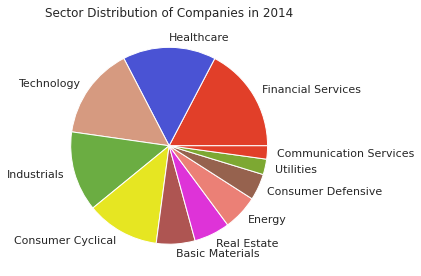

In [0]:
colors = ["#E13F29", "#4a53d4","#D69A80","#6bad42","#e6e622", "#AE5552", "#de33d8", "#EB8076", "#96624E","#7da832"]
plt.pie(
    df_sector['Quantity'],
    labels=df_sector['Sector'],
    shadow=False,
    colors=colors,
)
plt.title('Sector Distribution of Companies in 2014')
plt.tight_layout()
plt.show()

In [0]:
df2014_class = pd.DataFrame(df2014['Class'].value_counts().reset_index())
df2014_class.rename(columns={'index':'Class','Class':'Quantity'},inplace=True)
df2014_class

,Class,Quantity
0,0,2174
1,1,1634


'Class=1' means that stock increases during next year, otherwise, it decreases next year. 

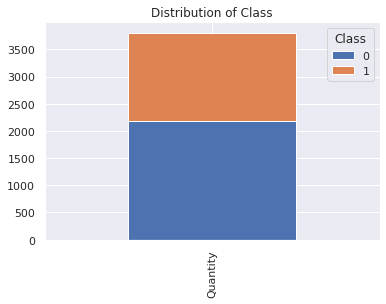

In [0]:
sns.set()
df2014_class.set_index('Class').T.plot(kind='bar', stacked=True)
plt.title('Distribution of Class')
plt.show();

Check the distribution of stock price increase in the next year
(get rid of outliers)

In [0]:
df_outlier = df2014.copy()

In [0]:
df_outlier.drop(df_outlier[df_outlier['2015 PRICE VAR [%]'] > 500].index, inplace = True) 

In [0]:
df_outlier['2015 PRICE VAR [%]'].max()

460.3237171806803

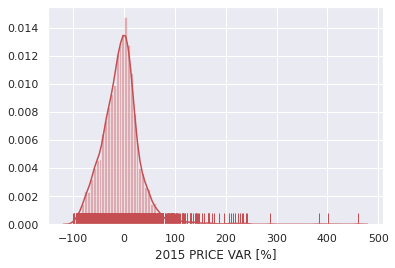

In [0]:
sns.distplot(df_outlier['2015 PRICE VAR [%]'],bins=100,rug=True, color='r');

In [0]:
df_FS = df2014[df2014['Sector'] == 'Financial Services']
df_HC = df2014[df2014['Sector'] == 'Healthcare']
df_TE = df2014[df2014['Sector'] == 'Technology']
df_IN = df2014[df2014['Sector'] == 'Industrials']
df_CC = df2014[df2014['Sector'] == 'Consumer Cyclical']
df_BM = df2014[df2014['Sector'] == 'Basic Materials']
df_RE = df2014[df2014['Sector'] == 'Real Estate']
df_EN = df2014[df2014['Sector'] == 'Energy']
df_CD = df2014[df2014['Sector'] == 'Consumer Defensive']
df_Ut = df2014[df2014['Sector'] == 'Utilities']
df_CS = df2014[df2014['Sector'] == 'Communication Services']

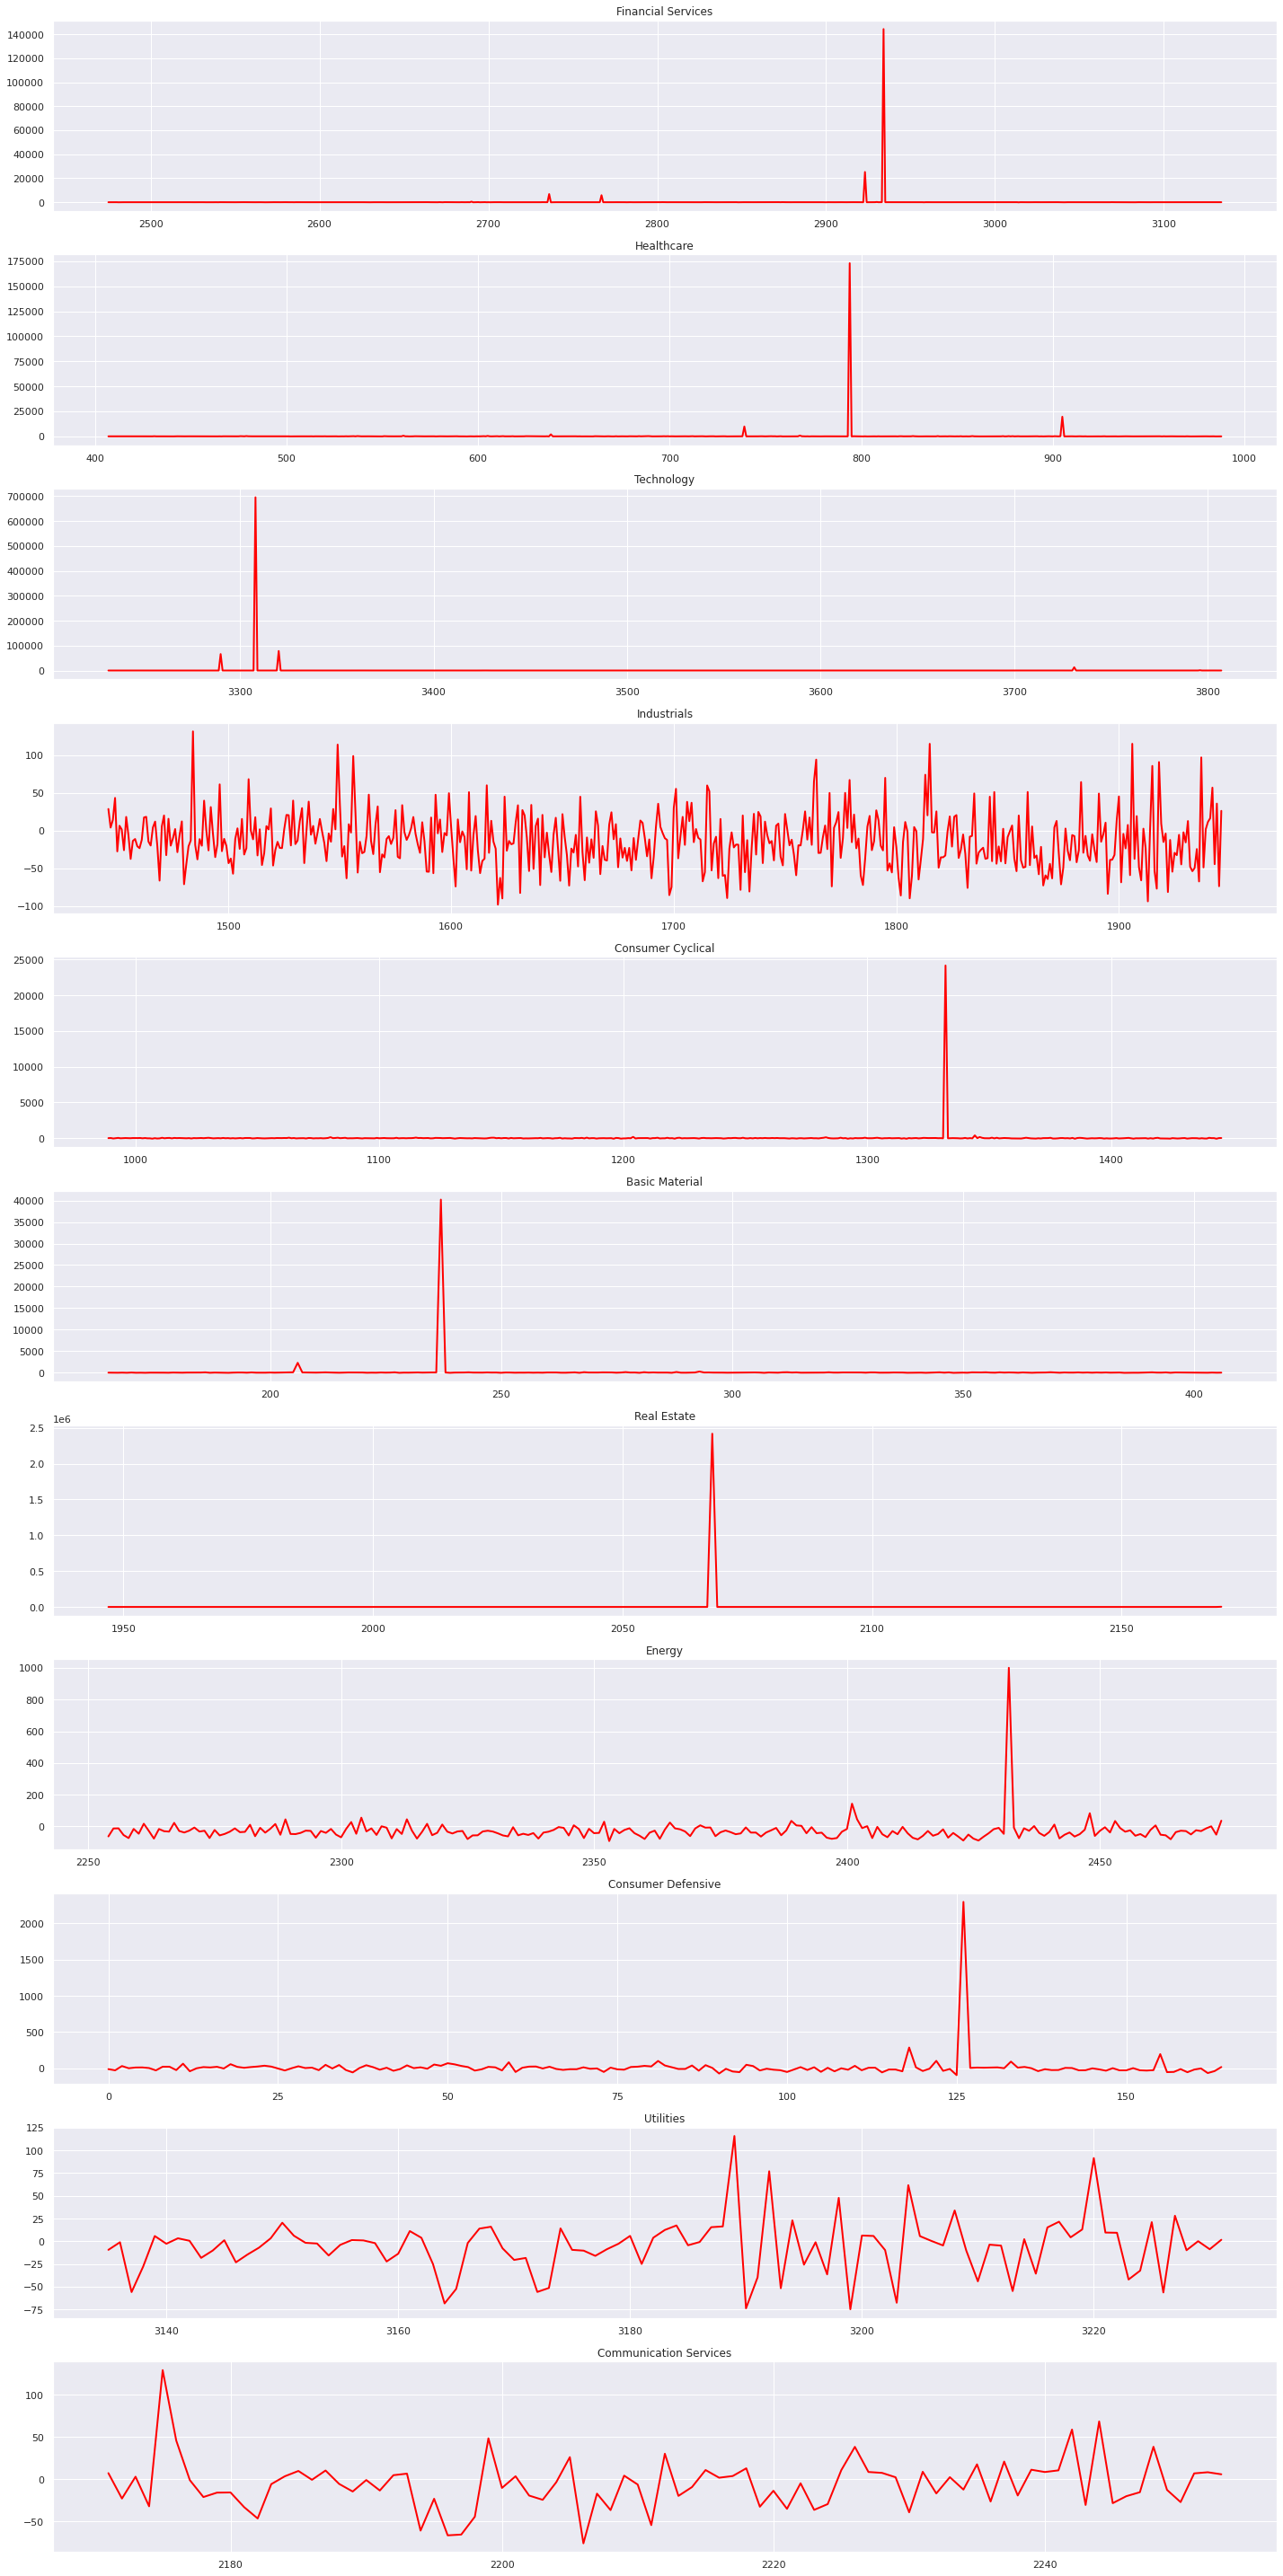

In [0]:
 fig, axes = plt.subplots(nrows=11, ncols=1, figsize = (20,40))
 axes[0].plot(df_FS['2015 PRICE VAR [%]'], color='red', lw=2);
 axes[0].set_title('Financial Services');
 axes[1].plot(df_HC['2015 PRICE VAR [%]'], color='red', lw=2);
 axes[1].set_title('Healthcare');
 axes[2].plot(df_TE['2015 PRICE VAR [%]'], color='red', lw=2);
 axes[2].set_title('Technology');
 axes[3].plot(df_IN['2015 PRICE VAR [%]'], color='red', lw=2);
 axes[3].set_title('Industrials');
 axes[4].plot(df_CC['2015 PRICE VAR [%]'], color='red', lw=2);
 axes[4].set_title('Consumer Cyclical');
 axes[5].plot(df_BM['2015 PRICE VAR [%]'], color='red', lw=2);
 axes[5].set_title('Basic Material');
 axes[6].plot(df_RE['2015 PRICE VAR [%]'], color='red', lw=2);
 axes[6].set_title('Real Estate');
 axes[7].plot(df_EN['2015 PRICE VAR [%]'], color='red', lw=2);
 axes[7].set_title('Energy');
 axes[8].plot(df_CD['2015 PRICE VAR [%]'], color='red', lw=2);
 axes[8].set_title('Consumer Defensive');
 axes[9].plot(df_Ut['2015 PRICE VAR [%]'], color='red', lw=2);
 axes[9].set_title('Utilities');
 axes[10].plot(df_CS['2015 PRICE VAR [%]'], color='red', lw=2);
 axes[10].set_title('Communication Services');
 fig.tight_layout()

Handle missing values

In [0]:
df2014.isnull().sum() #check missing values

Unnamed: 0                0
Revenue                  44
Revenue Growth          236
Cost of Revenue          74
Gross Profit             52
                       ... 
R&D Expense Growth      247
SG&A Expenses Growth    243
Sector                    0
2015 PRICE VAR [%]        0
Class                     0
Length: 225, dtype: int64

In [0]:
#Based on different sector, replace nan-values with median value of column
df2014_sector = df2014.groupby(['Sector']).transform(lambda x: x.fillna(x.median()))

In [0]:
df2014_sector.shape, df2014.shape

((3808, 223), (3808, 225))

In [0]:
df2014_sector.isnull().sum()

Revenue                 0
Revenue Growth          0
Cost of Revenue         0
Gross Profit            0
R&D Expenses            0
                       ..
Debt Growth             0
R&D Expense Growth      0
SG&A Expenses Growth    0
2015 PRICE VAR [%]      0
Class                   0
Length: 223, dtype: int64

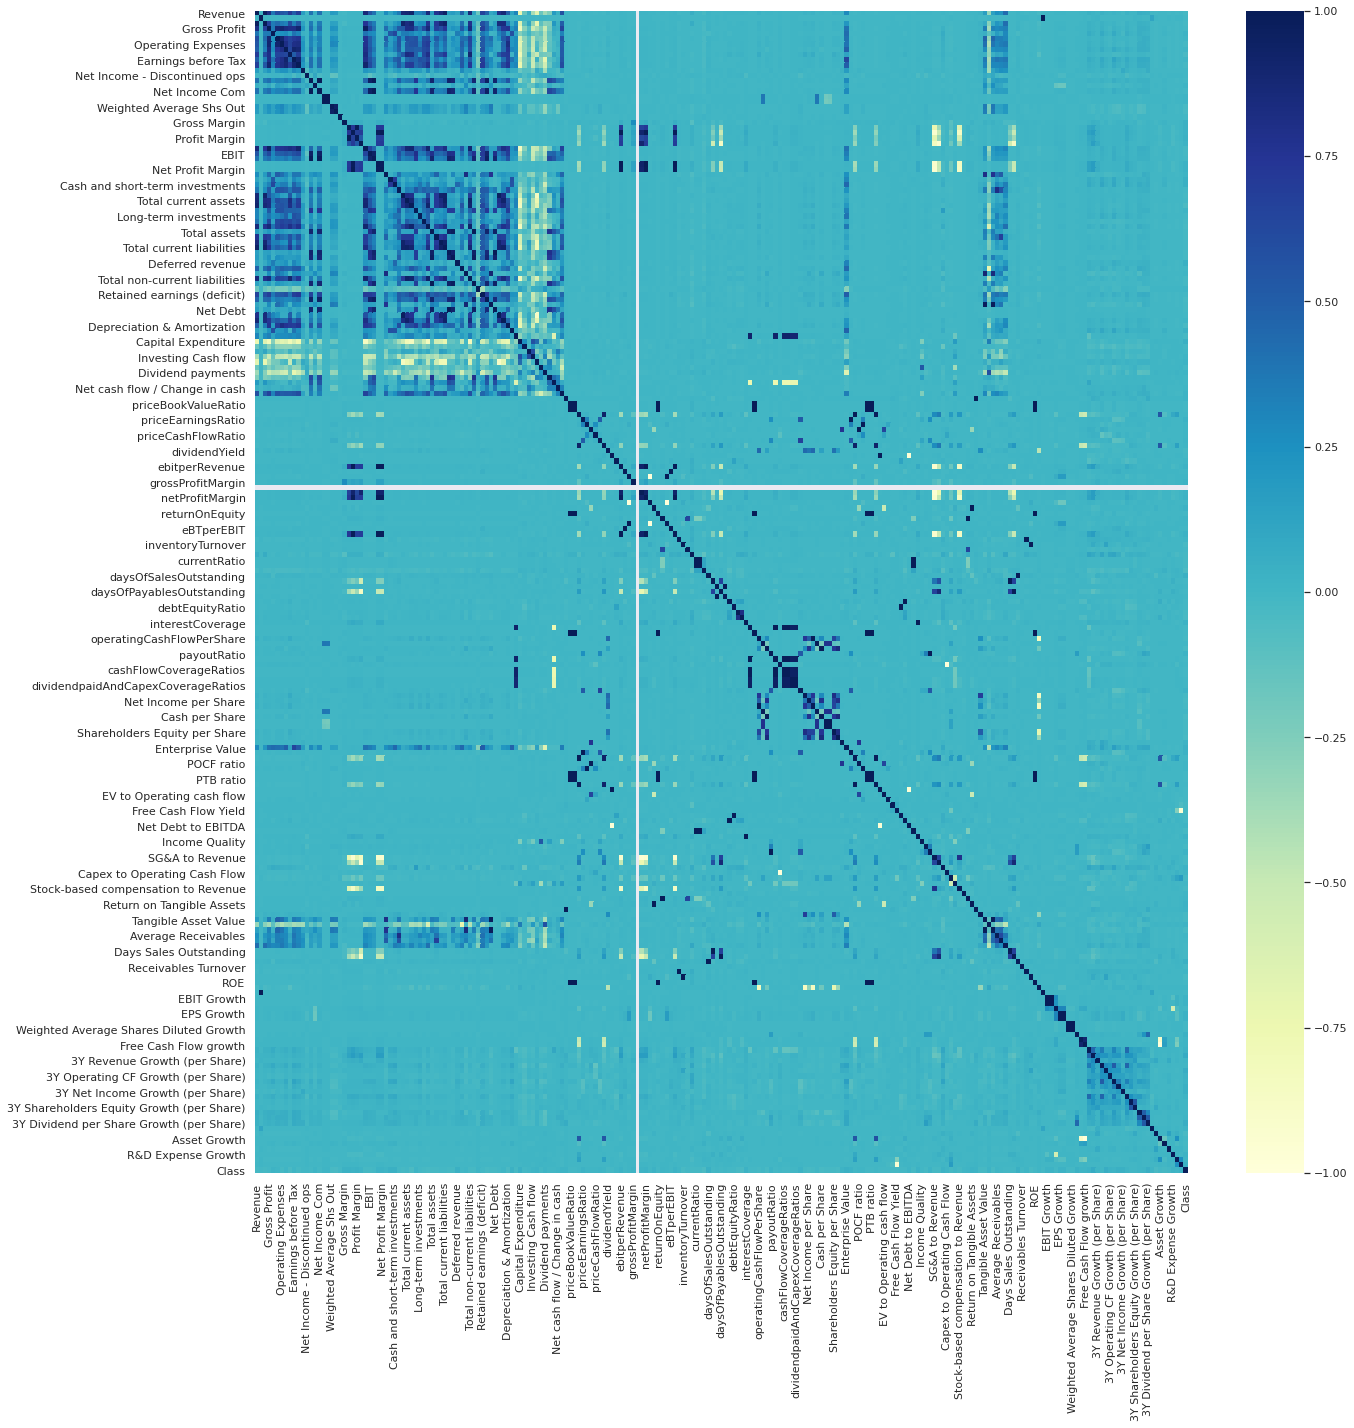

In [0]:
# Plot correlation matrix of output dataset
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df2014_sector.corr(), annot=False, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.tight_layout()

###XGBoost

In [0]:
df_all = pd.concat([df2014,df2015,df2016,df2017,df2018], axis=0, sort=False).drop_duplicates()
df_all.shape

(22077, 229)

In [0]:
df_all.rename(columns={'2015 PRICE VAR [%]':'2015',
                       '2016 PRICE VAR [%]':'2016',
                       '2017 PRICE VAR [%]':'2017',
                       '2018 PRICE VAR [%]':'2018',
                       '2019 PRICE VAR [%]':'2019'},inplace=True)
df_all.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       '2015', 'Class', '2016', '2017', '2018', '2019'],
      dtype='object', length=229)

In [0]:
df_cf = df_all.drop(['2015','2016','2017','2018','2019'], axis=1)
df_cf.shape

(22077, 224)

In [0]:
target = 'Class'
majority_class = df_all[target].mode()
majority_class

0    1
dtype: int64

In [0]:
df_all_pred = [majority_class] * len(df_all[target])

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(df_all[target], df_all_pred)

0.5507541785568691

In [0]:
 !pip install category_encoders==2.*

     |████████████████████████████████| 81kB 3.0MB/s 


In [0]:
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

In [0]:
train, test = train_test_split(df_cf, train_size=0.80, test_size=0.20,
                               stratify=df_cf['Class'],random_state=42)

In [0]:
features = train.drop(columns=[target]).columns.tolist()
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [0]:
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Unnamed: 0', 'Sector'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Unnamed: 0',
                                          'data_type': dtype('O'),
                                          'mapping': JMT        1
DKS        2
MGYR       3
CVLT       4
INSG       5
        ... 
APLP    4932
HIO     4933
LCA     4934
SLDB    4935
NaN       -2
Length: 4936, dtype: int64},
                                         {'col': 'Sector',
                                          'data_type': dtype('O'),
                                          'mapping...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=

In [0]:
print(f'Validation accuracy: {pipeline.score(X_test, y_test)}')

Validation accuracy: 0.6261322463768116


In [0]:
from sklearn.metrics import accuracy_score

y_pred = pipeline.predict(X_test)
print(f'Validation accuracy: {accuracy_score(y_test, y_pred)}')

Validation accuracy: 0.6261322463768116


###Permutation Importances

In [0]:
transformers = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)
X_train_transformed = transformers.fit_transform(X_train)
X_test_transformed = transformers.transform(X_test)

model = XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
!pip install eli5

     |████████████████████████████████| 112kB 4.8MB/s 


In [0]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    random_state=42
)

permuter.fit(X_test_transformed, y_test)

PermutationImportance(cv='prefit',
                      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              learning_rate=0.1,
                                              max_delta_step=0, max_depth=3,
                                              min_child_weight=1, missing=None,
                                              n_estimators=100, n_jobs=-1,
                                              nthread=None,
                                              objective='binary:logistic',
                                              random_state=42, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weight=1,
                                              seed=None, silent=None,
                   

In [0]:
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

Effect of forex changes on cash    0.01
Other Assets                       0.01
effectiveTaxRate                   0.00
Sector                             0.00
Issuance (buybacks) of shares      0.00
                                   ... 
5Y Revenue Growth (per Share)     -0.00
Operating Expenses                -0.00
Book Value per Share              -0.00
cashPerShare                      -0.00
Receivables growth                -0.00
Length: 223, dtype: float64

In [0]:
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.0080 ± 0.0042,Effect of forex changes on cash
0.0063 ± 0.0019,Other Assets
0.0046 ± 0.0010,effectiveTaxRate
0.0039 ± 0.0012,Sector
0.0038 ± 0.0019,Issuance (buybacks) of shares
0.0036 ± 0.0045,Enterprise Value over EBITDA
0.0034 ± 0.0027,Net Income per Share
0.0031 ± 0.0016,Weighted Average Shs Out (Dil)
0.0030 ± 0.0026,niperEBT
0.0030 ± 0.0020,Weighted Average Shs Out
